# Ultimate Tech Take Home Challenge

## Part 1 - Exploratory Data Analysis

In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
%matplotlib inline

In [431]:
# load data and add column to sum logins
df = pd.read_json('logins.json')
df.set_index('login_time', inplace=True)
df['logins'] = 1


In [432]:
# resample to get in 15 min intervals and pull in day of week and weekday vs weekend
df = df.resample('15T').sum()
s = df.index.to_series()
df['day_of_week'] = s.dt.day_name()
df['day_of_week_num'] = s.dt.dayofweek
df['weekday'] = np.where((df.day_of_week_num) > 4,'weekend','weekday')
df

logins day_of_week  day_of_week_num  weekday
login_time                                                       
1970-01-01 20:00:00       2    Thursday                3  weekday
1970-01-01 20:15:00       6    Thursday                3  weekday
1970-01-01 20:30:00       9    Thursday                3  weekday
1970-01-01 20:45:00       7    Thursday                3  weekday
1970-01-01 21:00:00       1    Thursday                3  weekday
...                     ...         ...              ...      ...
1970-04-13 17:45:00       5      Monday                0  weekday
1970-04-13 18:00:00       5      Monday                0  weekday
1970-04-13 18:15:00       2      Monday                0  weekday
1970-04-13 18:30:00       7      Monday                0  weekday
1970-04-13 18:45:00       6      Monday                0  weekday

[9788 rows x 4 columns]

In [433]:
# show most and least popular days/times
print(df.logins.nlargest(20))
print(df.logins.nsmallest(5))

login_time
1970-03-01 04:30:00    73
1970-04-04 05:30:00    66
1970-04-04 01:30:00    64
1970-04-04 01:15:00    63
1970-04-01 23:30:00    60
1970-04-04 05:00:00    60
1970-04-04 04:45:00    59
1970-04-04 05:15:00    59
1970-04-04 01:45:00    56
1970-03-13 22:15:00    55
1970-04-04 01:00:00    54
1970-03-17 01:30:00    53
1970-04-04 00:30:00    53
1970-03-29 04:45:00    52
1970-03-08 04:45:00    51
1970-02-15 04:45:00    50
1970-03-28 04:30:00    50
1970-03-29 02:15:00    50
1970-04-03 22:45:00    50
1970-04-04 00:45:00    50
Name: logins, dtype: int64
login_time
1970-01-01 21:30:00    0
1970-01-02 04:15:00    0
1970-01-02 06:15:00    0
1970-01-02 18:00:00    0
1970-01-03 08:45:00    0
Name: logins, dtype: int64


In [434]:
# days with most logins
df_day = df.resample('D').sum()
df_day.drop('day_of_week_num', axis=1, inplace=True)
df_day.sort_values(by='logins',inplace=True, ascending=False)
df_day.head(10)

logins
login_time        
1970-04-04    1889
1970-03-14    1706
1970-03-07    1666
1970-03-15    1565
1970-03-29    1523
1970-04-03    1504
1970-03-28    1488
1970-03-21    1485
1970-02-21    1479
1970-03-22    1472

In [435]:
# trend of daily logins
df_day2 = df.resample('D').sum()
fig = plt.figure(figsize=(7,5))
plt.plot(df_day2.index, df_day2.logins)
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('logins')
plt.title('login trend')
plt.show()
fig.savefig('daily_logins_trend.png')

In [436]:
# weekday vs weekend logins
df_weekend = df.groupby(['weekday'])[['logins']].sum()
print(df_weekend)



         logins
weekday        
weekday   55598
weekend   37544


In [443]:
# day of the week trend
df_dow = df.groupby(['day_of_week_num'])[['logins']].sum()

fig = plt.figure(figsize=(7,5))
plt.plot(df_dow.index, df_dow.logins)
plt.ylabel('logins')
plt.ylabel('day of week')
plt.title('logins per day of week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
          rotation=45)
plt.tight_layout()
plt.show()
fig.savefig('dayofweek_logins_trend.png')

In [438]:
# most popular hours of day to ride
df2 = df.groupby(df.index.map(lambda t: t.hour))[['logins']].sum()
fig = plt.figure(figsize=(7,5))
plt.plot(df2.index, df2.logins)
plt.xlabel('hour')
plt.ylabel('logins')
plt.title('hourly logins trend')
plt.show()
fig.savefig('hourly_logins_trend.png')

In [439]:
# most popular hours of day to ride on SATURDAYS
df_sat = df[df.day_of_week == 'Saturday']
df_sat = df_sat.groupby(df_sat.index.map(lambda t: t.hour))[['logins']].sum()
fig = plt.figure(figsize=(7,5))
plt.plot(df_sat.index, df_sat.logins)
plt.xlabel('hour')
plt.ylabel('logins')
plt.title('hourly logins trend - Saturdays')
plt.show()
fig.savefig('hourly_logins_trend_sat.png')

            logins day_of_week  day_of_week_num  weekday
login_time                                              
1970-04-06       6      Monday                0  weekday


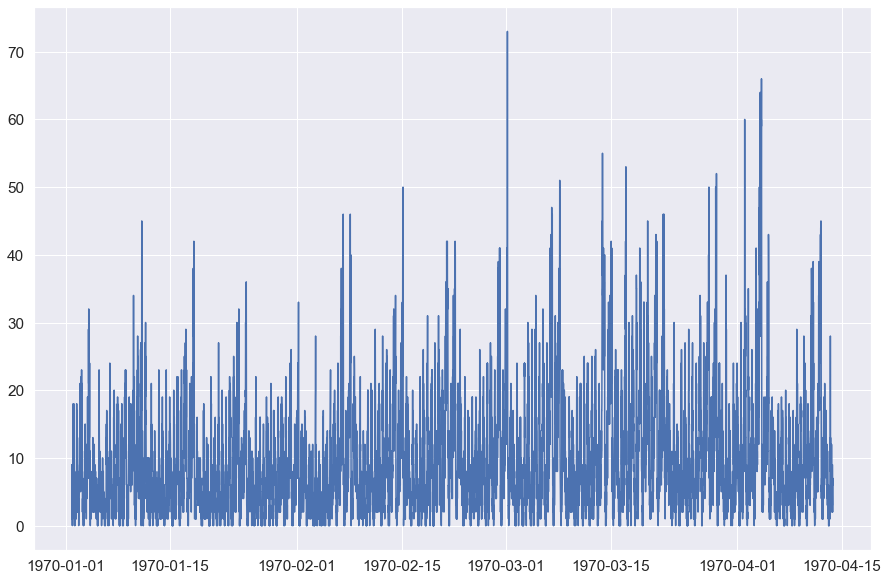

In [440]:
# plotting to characterize the underlying patterns of the demand
dftest = df[df.index == '1970-04-6']
print(dftest)
plt.figure(figsize=(15,10))
plt.plot(df.index, df.logins)
plt.show()

## Part 3 - Predictive Modeling

In [444]:
df_chal = pd.read_json('ultimate_data_challenge.json')
df_chal

city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
1                       5.0       1.00     2014-05-05  Android        0.0   
2                       4.3       1.00     2014-01-07   iPhone        0.0   
3                       4.6       1.14     2014-06-29   iPhone       20.0   
4                       4.4       1.19     2014-03-15  Android       11.8   
...                     ...        ...            ...      ...        ...   
49995                   5.0       1.00     2014-06-05   iPhone        0.0   
49996                   NaN       1.00     2014-01-25   iPhone        0.0   
49997                   5.0       1.00     2014-05-22  Android        0.0   
49998                   3.0       1.00     2014-01-15   iPhone        0.0   
49999                   NaN       1.00     2014-04-20  Android        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  
0                     True         46.2      3.67                   5.0  
1                    False         50.0      8.26                   5.0  
2                    False        100.0      0.77                   5.0  
3                     True         80.0      2.36                   4.9  
4                    False         82.4      3.13                   4.9  
...                    ...          ...       ...                   ...  
49995                False        100.0      5.63                   4.2  
49996                False          0.0      0.00                   4.0  
49997                 True        100.0      3.86                   5.0  
49998                False        100.0      4.58                   3.5  
49999                False          0.0      3.49                   5.0  

[50000 rows x 12 columns]

In [445]:
# fill null values of ratings (driver and rider) with the mean value
df_chal.avg_rating_of_driver.fillna(df_chal.avg_rating_of_driver.mean(), inplace=True)
df_chal.avg_rating_by_driver.fillna(df_chal.avg_rating_by_driver.mean(), inplace=True)

# make date columns datetime format
df_chal.signup_date = pd.to_datetime(df_chal.signup_date)
df_chal.last_trip_date = pd.to_datetime(df_chal.last_trip_date)
df_chal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [446]:
# Dummy Encode categorical features
dfo = pd.DataFrame(df_chal[['city', 'phone']])
df_chal = pd.concat([df_chal.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)
df_chal

trips_in_first_30_days signup_date  avg_rating_of_driver  avg_surge  \
0                           4  2014-01-25              4.700000       1.10   
1                           0  2014-01-29              5.000000       1.00   
2                           3  2014-01-06              4.300000       1.00   
3                           9  2014-01-10              4.600000       1.14   
4                          14  2014-01-27              4.400000       1.19   
...                       ...         ...                   ...        ...   
49995                       0  2014-01-25              5.000000       1.00   
49996                       1  2014-01-24              4.601559       1.00   
49997                       0  2014-01-31              5.000000       1.00   
49998                       2  2014-01-14              3.000000       1.00   
49999                       0  2014-01-18              4.601559       1.00   

      last_trip_date  surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0         2014-06-17       15.4                 True         46.2      3.67   
1         2014-05-05        0.0                False         50.0      8.26   
2         2014-01-07        0.0                False        100.0      0.77   
3         2014-06-29       20.0                 True         80.0      2.36   
4         2014-03-15       11.8                False         82.4      3.13   
...              ...        ...                  ...          ...       ...   
49995     2014-06-05        0.0                False        100.0      5.63   
49996     2014-01-25        0.0                False          0.0      0.00   
49997     2014-05-22        0.0                 True        100.0      3.86   
49998     2014-01-15        0.0                False        100.0      4.58   
49999     2014-04-20        0.0                False          0.0      3.49   

       avg_rating_by_driver  city_Astapor  city_King's Landing  \
0                       5.0             0                    1   
1                       5.0             1                    0   
2                       5.0             1                    0   
3                       4.9             0                    1   
4                       4.9             0                    0   
...                     ...           ...                  ...   
49995                   4.2             0                    1   
49996                   4.0             1                    0   
49997                   5.0             0                    0   
49998                   3.5             1                    0   
49999                   5.0             1                    0   

       city_Winterfell  phone_Android  phone_iPhone  
0                    0              0             1  
1                    0              1             0  
2                    0              0             1  
3                    0              0             1  
4                    1              1             0  
...                ...            ...           ...  
49995                0              0             1  
49996                0              0             1  
49997                1              1             0  
49998                0              0             1  
49999                0              1             0  

[50000 rows x 15 columns]

In [447]:
#df_chal.ultimate_black_user = df_chal[df_chal.ultimate_black_user == True].astype(int)
df_chal['ultimate_black_user_2'] = df_chal['ultimate_black_user'].astype(int)
df_chal.drop('ultimate_black_user', axis=1, inplace=True)
df_chal

trips_in_first_30_days signup_date  avg_rating_of_driver  avg_surge  \
0                           4  2014-01-25              4.700000       1.10   
1                           0  2014-01-29              5.000000       1.00   
2                           3  2014-01-06              4.300000       1.00   
3                           9  2014-01-10              4.600000       1.14   
4                          14  2014-01-27              4.400000       1.19   
...                       ...         ...                   ...        ...   
49995                       0  2014-01-25              5.000000       1.00   
49996                       1  2014-01-24              4.601559       1.00   
49997                       0  2014-01-31              5.000000       1.00   
49998                       2  2014-01-14              3.000000       1.00   
49999                       0  2014-01-18              4.601559       1.00   

      last_trip_date  surge_pct  weekday_pct  avg_dist  avg_rating_by_driver  \
0         2014-06-17       15.4         46.2      3.67                   5.0   
1         2014-05-05        0.0         50.0      8.26                   5.0   
2         2014-01-07        0.0        100.0      0.77                   5.0   
3         2014-06-29       20.0         80.0      2.36                   4.9   
4         2014-03-15       11.8         82.4      3.13                   4.9   
...              ...        ...          ...       ...                   ...   
49995     2014-06-05        0.0        100.0      5.63                   4.2   
49996     2014-01-25        0.0          0.0      0.00                   4.0   
49997     2014-05-22        0.0        100.0      3.86                   5.0   
49998     2014-01-15        0.0        100.0      4.58                   3.5   
49999     2014-04-20        0.0          0.0      3.49                   5.0   

       city_Astapor  city_King's Landing  city_Winterfell  phone_Android  \
0                 0                    1                0              0   
1                 1                    0                0              1   
2                 1                    0                0              0   
3                 0                    1                0              0   
4                 0                    0                1              1   
...             ...                  ...              ...            ...   
49995             0                    1                0              0   
49996             1                    0                0              0   
49997             0                    0                1              1   
49998             1                    0                0              0   
49999             1                    0                0              1   

       phone_iPhone  ultimate_black_user_2  
0                 1                      1  
1                 0                      0  
2                 1                      0  
3                 1                      1  
4                 0                      0  
...             ...                    ...  
49995             1                      0  
49996             1                      0  
49997             0                      1  
49998             1                      0  
49999             0                      0  

[50000 rows x 15 columns]

In [448]:
# make sure no NaN values. Phone NaNs will be taken care of once onehot encoded
df_chal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_rating_of_driver    50000 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   surge_pct               50000 non-null  float64       
 6   weekday_pct             50000 non-null  float64       
 7   avg_dist                50000 non-null  float64       
 8   avg_rating_by_driver    50000 non-null  float64       
 9   city_Astapor            50000 non-null  uint8         
 10  city_King's Landing     50000 non-null  uint8         
 11  city_Winterfell         50000 non-null  uint8         
 12  phone_Android           50000 non-null  uint8 

In [449]:
df_chal.describe().T

count       mean        std  min    25%    50%  \
trips_in_first_30_days  50000.0   2.278200   3.792684  0.0   0.00   1.00   
avg_rating_of_driver    50000.0   4.601559   0.564977  1.0   4.50   4.70   
avg_surge               50000.0   1.074764   0.222336  1.0   1.00   1.00   
surge_pct               50000.0   8.849536  19.958811  0.0   0.00   0.00   
weekday_pct             50000.0  60.926084  37.081503  0.0  33.30  66.70   
avg_dist                50000.0   5.796827   5.707357  0.0   2.42   3.88   
avg_rating_by_driver    50000.0   4.778158   0.445753  1.0   4.70   5.00   
city_Astapor            50000.0   0.330680   0.470463  0.0   0.00   0.00   
city_King's Landing     50000.0   0.202600   0.401941  0.0   0.00   0.00   
city_Winterfell         50000.0   0.466720   0.498896  0.0   0.00   0.00   
phone_Android           50000.0   0.300440   0.458454  0.0   0.00   0.00   
phone_iPhone            50000.0   0.691640   0.461821  0.0   0.00   1.00   
ultimate_black_user_2   50000.0   0.377080   0.484660  0.0   0.00   0.00   

                           75%     max  
trips_in_first_30_days    3.00  125.00  
avg_rating_of_driver      5.00    5.00  
avg_surge                 1.05    8.00  
surge_pct                 8.60  100.00  
weekday_pct             100.00  100.00  
avg_dist                  6.94  160.96  
avg_rating_by_driver      5.00    5.00  
city_Astapor              1.00    1.00  
city_King's Landing       0.00    1.00  
city_Winterfell           1.00    1.00  
phone_Android             1.00    1.00  
phone_iPhone              1.00    1.00  
ultimate_black_user_2     1.00    1.00

In [450]:
df_chal.last_trip_date.nlargest()

17    2014-07-01
87    2014-07-01
96    2014-07-01
147   2014-07-01
297   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

In [451]:
# Create binary retain column and convert dummy columns to int data type
df_chal['retain_date'] = df_chal.last_trip_date.max() - timedelta(days=30)
df_chal['retain'] = np.where(df_chal.last_trip_date > df_chal.retain_date, 1, 0)
df_chal.drop('retain_date', axis=1, inplace=True)
df_chal[['city_Astapor', "city_King's Landing", 'city_Winterfell', 'phone_Android', 'phone_iPhone', 
    'ultimate_black_user_2']] = df_chal[['city_Astapor', "city_King's Landing", 'city_Winterfell', 
                                         'phone_Android', 'phone_iPhone', 'ultimate_black_user_2']].astype('int64') 
df_chal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_rating_of_driver    50000 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   surge_pct               50000 non-null  float64       
 6   weekday_pct             50000 non-null  float64       
 7   avg_dist                50000 non-null  float64       
 8   avg_rating_by_driver    50000 non-null  float64       
 9   city_Astapor            50000 non-null  int64         
 10  city_King's Landing     50000 non-null  int64         
 11  city_Winterfell         50000 non-null  int64         
 12  phone_Android           50000 non-null  int64 

In [452]:
df_chal.retain.value_counts()

0    31690
1    18310
Name: retain, dtype: int64

In [453]:
# calculate retention
retention = df_chal.retain.value_counts()[1] / \
            (df_chal.retain.value_counts()[0] + \
             df_chal.retain.value_counts()[1])

print('{} riders retained'.format(df_chal.retain.value_counts()[1]))
print('{} riders not retained'.format(df_chal.retain.value_counts()[0]))
print('{}% of riders were retained'.format(round(retention * 100, 2)))

18310 riders retained
31690 riders not retained
36.62% of riders were retained


In [454]:
#Calculate all correlation coefficients
corr = df_chal.corr()
corr_viz = corr.round(2).style.background_gradient(cmap='coolwarm')
corr_viz

In [455]:
X = df_chal.drop(['signup_date', 'last_trip_date', 'retain'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   weekday_pct             50000 non-null  float64
 5   avg_dist                50000 non-null  float64
 6   avg_rating_by_driver    50000 non-null  float64
 7   city_Astapor            50000 non-null  int64  
 8   city_King's Landing     50000 non-null  int64  
 9   city_Winterfell         50000 non-null  int64  
 10  phone_Android           50000 non-null  int64  
 11  phone_iPhone            50000 non-null  int64  
 12  ultimate_black_user_2   50000 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 5.0 MB


In [456]:
# import modeling packages

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [457]:
# formula to evaluate different models
def evaluate(y_test, y_pred):
    '''Print Classification Report and Confusion Matrix'''
    
    print(classification_report(y_test, y_pred))
    
    matrix = confusion_matrix(y_test, y_pred)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Build the plot
    plt.figure(figsize=(7,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

In [482]:
# formulas for feature importance
def imp_df(column_names, importances):
    '''create DF with feature name and feature importance'''
    
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 34):
    '''Run the feature importances by dropping each column and seeing impact to predictions. Long run time.'''
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
        
    return importances_df

def plot_feat_imp(df, X, model):
    '''create horizontal bar plot of feature importances'''
    
    df['feat_imp_rate'] = 100.0 * (df.feature_importance / df.feature_importance.max())
    sorted_idx_rf = np.argsort(df.feat_imp_rate)
    pos_rf = np.arange(sorted_idx_rf.shape[0]) + .5
    
    fig = plt.figure(figsize=(5,7))
    plt.barh(pos_rf, df.feat_imp_rate[sorted_idx_rf], align='center')
    plt.yticks(pos_rf, X.columns[sorted_idx_rf], fontsize=10)
    plt.xlabel('Relative Importance')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
    fig.savefig(model + '_feature_imp.png')

In [481]:
plt.figure?


In [459]:
X = df_chal.drop(['signup_date', 'last_trip_date', 'retain'], axis=1)

y = df_chal.retain

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [411]:
# Random Forest GridSearch
import time
from sklearn.model_selection import GridSearchCV

start_time_GS_cv = time.time()

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5, 15, 30, 50, 75, 100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 7, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}
rfr = RandomForestClassifier()
rfr_gs = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, verbose=2, n_jobs = -1)

rfr_gs.fit(X_train, y_train)

end_time_GS_cv = time.time()
print('Run time:',end_time_GS_cv - start_time_GS_cv, 'seconds')
print(rfr_gs.best_params_)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed: 36.4min finished


Run time: 2184.8571162223816 seconds
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 2}


              precision    recall  f1-score   support

           0       0.81      0.87      0.84      6292
           1       0.75      0.66      0.70      3708

    accuracy                           0.79     10000
   macro avg       0.78      0.76      0.77     10000
weighted avg       0.79      0.79      0.79     10000



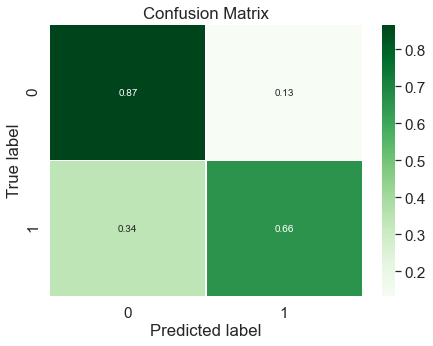

In [460]:
# Train RF Classifier - use optimal hyperparameters from gridsearch
rf = RandomForestClassifier(bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=7, 
                            min_samples_split=2,random_state=34) 
model_rf = rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Evaluate model
rf_eval = evaluate(y_test, y_pred_rf)
rf_eval

In [461]:
# Cross validate Random Forest Classifier
rf_scores = cross_validate(rf, X_train, y_train, cv=3,
                        scoring=('precision', 'recall', 'f1'))
print(pd.DataFrame(rf_scores))

   fit_time  score_time  test_precision  test_recall   test_f1
0  2.014979    0.243502        0.741736     0.640715  0.687534
1  1.758475    0.178012        0.745718     0.644134  0.691214
2  1.693996    0.181846        0.742489     0.639819  0.687341


In [462]:
# drop-column feature importance
drop_col_feat_imp(rf, X_train, y_train)

feature  feature_importance
0                 avg_dist            0.011575
1              weekday_pct            0.008400
2   trips_in_first_30_days            0.006725
3    ultimate_black_user_2            0.005875
4     avg_rating_by_driver            0.004275
5     avg_rating_of_driver            0.002000
6                surge_pct            0.001725
7                avg_surge            0.000700
8          city_Winterfell           -0.002250
9      city_King's Landing           -0.002350
10            city_Astapor           -0.002525
11            phone_iPhone           -0.003875
12           phone_Android           -0.004550

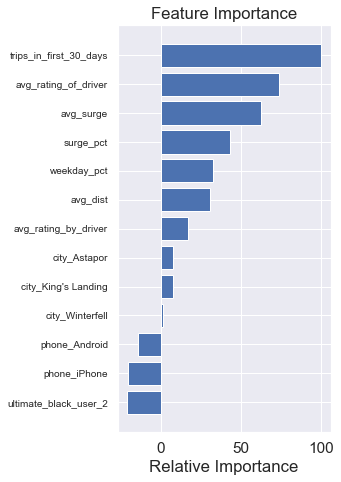

In [483]:
# plot feature importances for rf model
plot_feat_imp(feat_imp, X, 'rf')


              precision    recall  f1-score   support

           0       0.79      0.82      0.81      6292
           1       0.68      0.64      0.66      3708

    accuracy                           0.75     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.75      0.75      0.75     10000



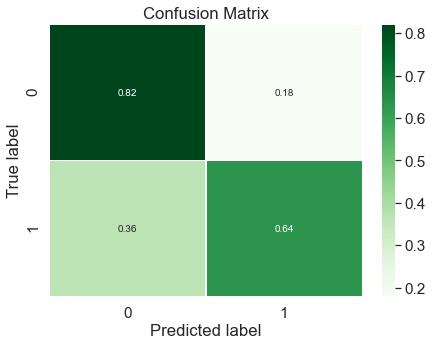

In [464]:
# Train K Nearest Neighbors Classifier
knn = KNeighborsClassifier()
model_knn = knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# Evaluate model
knn_eval = evaluate(y_test, y_pred_knn)
knn_eval

In [470]:
# Cross validate K Nearest Neighbors
knn_scores = cross_validate(knn, X_train, y_train, cv=3,
                        scoring=('precision', 'recall', 'f1'))
knn_scores

{'fit_time': array([0.13939691, 0.14437294, 0.13571787]),
 'score_time': array([0.84745693, 0.86273003, 0.90066004]),
 'test_precision': array([0.66115156, 0.66936754, 0.66013216]),
 'test_recall': array([0.61565325, 0.61105404, 0.61577974]),
 'test_f1': array([0.63759175, 0.63888292, 0.63718507])}

In [471]:
# Train Naive Bayes Classifier
nb = GaussianNB()
model_nb = nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# Evaluate model
nb_eval = evaluate(y_test, y_pred_nb)
nb_eval

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      6292
           1       0.58      0.70      0.64      3708

    accuracy                           0.70     10000
   macro avg       0.69      0.70      0.69     10000
weighted avg       0.72      0.70      0.71     10000



In [472]:
# Cross validate Naive Bayes
nb_scores = cross_validate(nb, X_train, y_train, cv=3,
                        scoring=('precision', 'recall', 'f1'))
nb_scores

{'fit_time': array([0.01810193, 0.02430415, 0.01673388]),
 'score_time': array([0.04991603, 0.04512691, 0.02310109]),
 'test_precision': array([0.57891156, 0.5803206 , 0.58261766]),
 'test_recall': array([0.69926048, 0.69919869, 0.69693857]),
 'test_f1': array([0.63342017, 0.63423726, 0.63467116])}

In [475]:
# scale training set for logistic regression

X = df_chal.drop(['signup_date', 'last_trip_date', 'retain'], axis=1)

y = df_chal.retain

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.2, random_state=34)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      6292
           1       0.66      0.49      0.56      3708

    accuracy                           0.72     10000
   macro avg       0.70      0.67      0.68     10000
weighted avg       0.71      0.72      0.71     10000



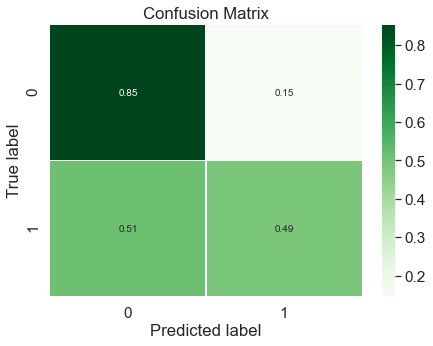

In [476]:
# Train Logistic Regression Classifier
lr = LogisticRegression()
model_lr = lr.fit(X_train2, y_train2)
y_pred_lr = model_lr.predict(X_test2)

# Evaluate model
lr_eval = evaluate(y_test2, y_pred_lr)
lr_eval

In [477]:
# Cross validate Logistic Regression
lr_scores = cross_validate(lr, X_train2, y_train2, cv=3,
                        scoring=('precision', 'recall', 'f1'))
lr_scores

{'fit_time': array([0.20091176, 0.04413319, 0.06047797]),
 'score_time': array([0.01838636, 0.01915979, 0.01891518]),
 'test_precision': array([0.67510549, 0.66685362, 0.66831819]),
 'test_recall': array([0.49301561, 0.48859667, 0.49886994]),
 'test_f1': array([0.56986822, 0.56397486, 0.57129412])}